# Load Dataset 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
df = pd.read_csv('../Datasets/train-balanced-sarcasm.csv')
df.head()

label                                            comment     author  \
0      0                                         NC and NH.  Trumpbart   
1      0  You do know west teams play against west teams...  Shbshb906   
2      0  They were underdogs earlier today, but since G...   Creepeth   
3      0  This meme isn't funny none of the "new york ni...  icebrotha   
4      0                    I could use one of those tools.  cush2push   

            subreddit  score  ups  downs     date          created_utc  \
0            politics      2   -1     -1  2016-10  2016-10-16 23:55:23   
1                 nba     -4   -1     -1  2016-11  2016-11-01 00:24:10   
2                 nfl      3    3      0  2016-09  2016-09-22 21:45:37   
3  BlackPeopleTwitter     -8   -1     -1  2016-10  2016-10-18 21:03:47   
4  MaddenUltimateTeam      6   -1     -1  2016-12  2016-12-30 17:00:13   

                                      parent_comment  
0  Yeah, I get that argument. At this point, I'd ...  
1  The blazers and Mavericks (The wests 5 and 6 s...  
2                            They're favored to win.  
3                         deadass don't kill my buzz  
4  Yep can confirm I saw the tool they use for th...

In [ ]:
df.tail()

label                                            comment  \
1010821      1  I'm sure that Iran and N. Korea have the techn...   
1010822      1                 whatever you do, don't vote green!   
1010823      1  Perhaps this is an atheist conspiracy to make ...   
1010824      1  The Slavs got their own country - it is called...   
1010825      1  values, as in capitalism .. there is good mone...   

                 author   subreddit  score  ups  downs     date  \
1010821       TwarkMain  reddit.com      2    2      0  2009-04   
1010822        BCHarvey     climate      1    1      0  2009-05   
1010823  rebelcommander     atheism      1    1      0  2009-01   
1010824           catsi   worldnews      1    1      0  2009-01   
1010825        frogking    politics      2    2      0  2009-01   

                 created_utc  \
1010821  2009-04-25 00:47:52   
1010822  2009-05-14 22:27:40   
1010823  2009-01-11 00:22:57   
1010824  2009-01-23 21:12:49   
1010825  2009-01-24 06:20:14   

                                            parent_comment  
1010821  No one is calling this an engineered pathogen,...  
1010822  In a move typical of their recent do-nothing a...  
1010823  Screw the Disabled--I've got to get to Church ...  
1010824  I've always been unsettled by that. I hear a l...  
1010825  Why do the people who make our laws seem unabl...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010771 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [ ]:
# check for any NaN values
df.isna().sum()

label              0
comment           55
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

label             0
comment           0
author            0
subreddit         0
score             0
ups               0
downs             0
date              0
created_utc       0
parent_comment    0
dtype: int64

In [ ]:
df.describe()

label         score           ups         downs
count  1.010771e+06  1.010771e+06  1.010771e+06  1.010771e+06
mean   4.999827e-01  6.886007e+00  5.499149e+00 -1.458679e-01
std    5.000002e-01  4.834416e+01  4.127406e+01  3.529739e-01
min    0.000000e+00 -5.070000e+02 -5.070000e+02 -1.000000e+00
25%    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
50%    0.000000e+00  2.000000e+00  1.000000e+00  0.000000e+00
75%    1.000000e+00  4.000000e+00  3.000000e+00  0.000000e+00
max    1.000000e+00  9.070000e+03  5.163000e+03  0.000000e+00

In [ ]:
df.shape

(1010771, 10)

# EDA for Categorical Variables
## label, comment, author, subreddit, date, parent_comment


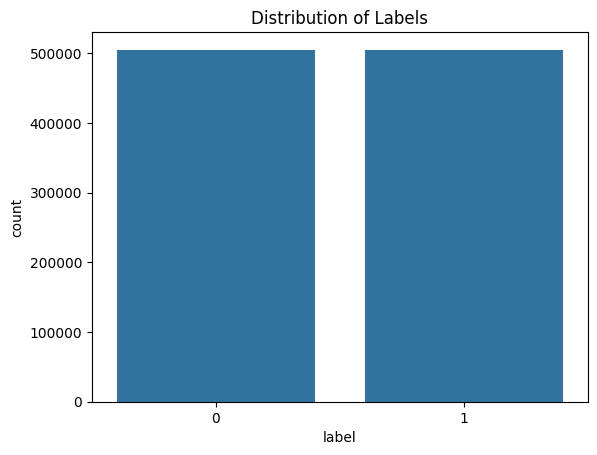

In [ ]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

In [ ]:
def get_top_words(df, column_name, num_words):
  count_vectorizer = CountVectorizer(stop_words='english')
  word_count = count_vectorizer.fit_transform(df[column_name])

  word_sum = word_count.sum(axis=0)

  frequency = []
  for word, index in count_vectorizer.vocabulary_.items():
    frequency.append((word, word_sum[0, index]))

  frequency = sorted(frequency, key=lambda x: x[1], reverse=True)
  return frequency

In [ ]:
# Top 10 frequently used words from comments
print(get_top_words(df, 'comment', 10))

[('just', 61092), ('like', 55746), ('yeah', 41103), ('don', 40317), ('people', 36783), ('know', 26071), ('think', 24984), ('good', 24398), ('right', 23427), ('really', 19559), ('sure', 19452), ('time', 18864), ('yes', 17838), ('make', 17710), ('game', 16118), ('fuck', 15606), ('better', 14582), ('way', 14488), ('need', 14424), ('man', 14352), ('want', 14190), ('did', 14161), ('oh', 14006), ('didn', 13962), ('ll', 13557), ('got', 13337), ('ve', 13259), ('going', 13102), ('doesn', 12663), ('thing', 11955), ('say', 11362), ('mean', 11037), ('isn', 10881), ('shit', 10788), ('great', 10647), ('use', 10525), ('probably', 10400), ('actually', 10336), ('bad', 10249), ('obviously', 10225), ('pretty', 10177), ('does', 9945), ('new', 9771), ('guy', 9596), ('money', 9558), ('maybe', 9476), ('love', 9294), ('thought', 9263), ('totally', 9118), ('look', 9008), ('forgot', 8884), ('best', 8582), ('work', 8574), ('play', 8537), ('lol', 8423), ('let', 8365), ('real', 8200), ('thanks', 8008), ('said', 79

In [ ]:
# Top 10 frequently used words from parent_comment
print(get_top_words(df, 'parent_comment', 10))

[('just', 122106), ('like', 112241), ('people', 89533), ('don', 79207), ('think', 59408), ('know', 52016), ('time', 49934), ('really', 46947), ('game', 46683), ('good', 42176), ('make', 38006), ('ve', 37963), ('want', 37324), ('going', 33105), ('new', 32585), ('way', 32414), ('right', 31931), ('got', 31313), ('did', 30420), ('does', 27539), ('say', 27127), ('need', 26319), ('fuck', 25669), ('thing', 25132), ('doesn', 24932), ('actually', 23807), ('ll', 23393), ('better', 23137), ('year', 23010), ('years', 22582), ('didn', 22573), ('play', 22119), ('shit', 22094), ('use', 21709), ('sure', 21575), ('work', 21340), ('pretty', 21312), ('best', 21250), ('guy', 20936), ('day', 20551), ('said', 20393), ('lot', 19965), ('things', 19726), ('isn', 19512), ('man', 19443), ('bad', 18977), ('team', 18785), ('getting', 18219), ('guys', 17838), ('look', 17803), ('fucking', 17184), ('feel', 17172), ('probably', 17127), ('love', 16821), ('let', 16723), ('world', 16617), ('games', 16341), ('mean', 15994

In [ ]:
def plot_bar_chart(df, column, top_n, title):
  top_categories = df[column].value_counts().head(top_n)
  top_categories.plot(kind='barh', title=title)
  print(top_categories)
  plt.show()

author
Biffingston         845
pokemon_fetish      432
NeonDisease         422
ShyBiDude89         404
ivsciguy            342
mad-n-fla           318
mindlessrabble      302
Canada_girl         300
Chaoslab            252
sleaze_bag_alert    251
Name: count, dtype: int64


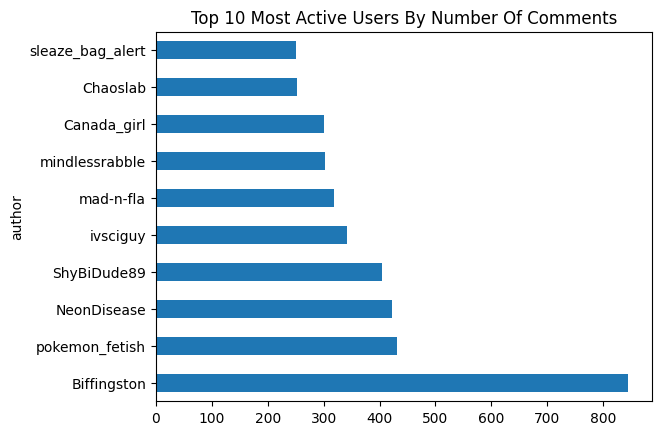

In [ ]:
plot_bar_chart(df, 'author', 10, 'Top 10 Most Active Users By Number Of Comments')

subreddit
AskReddit          65674
politics           39493
worldnews          26375
leagueoflegends    21034
pcmasterrace       18987
funny              17939
news               16891
pics               16152
todayilearned      14159
nfl                14149
Name: count, dtype: int64


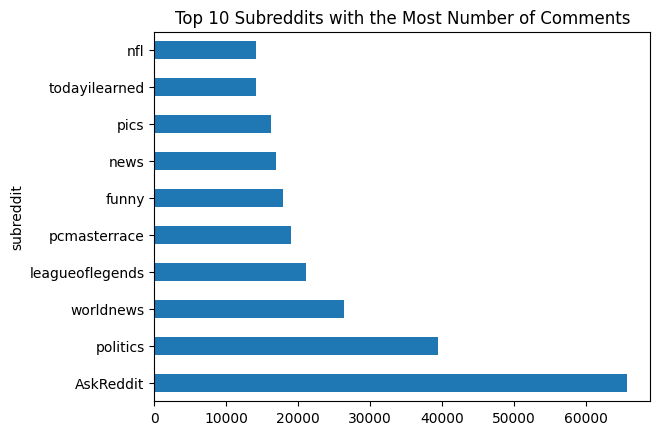

In [ ]:
plot_bar_chart(df, 'subreddit', 10, 'Top 10 Subreddits with the Most Number of Comments')

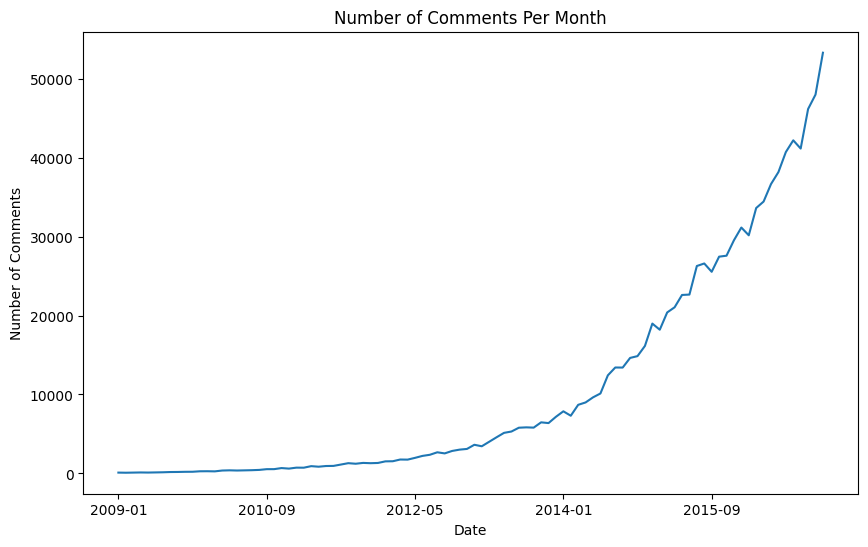

In [ ]:
# convert to date time
df['date_column'] = pd.to_datetime(df['date'], format='%Y-%m')

# count the number of comments per month
monthly_counts = df.groupby('date').size()

# plot the time series
plt.figure(figsize=(10,6))
monthly_counts.plot(kind='line')
plt.title('Number of Comments Per Month')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.show()

# EDA for Numerical Variables
## scores, ups, downs

In [ ]:
def box_plot(df, column, title):
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df[column])

  plt.title(title)
  plt.ylabel('Values')

In [ ]:
def histogram(df, column, title, bins):
  plt.figure(figsize=(8, 6))
  plt.hist(df[column], bins=bins, edgecolor='black')

  plt.title(title)
  plt.xlabel('Values')
  plt.ylabel('Frequency')

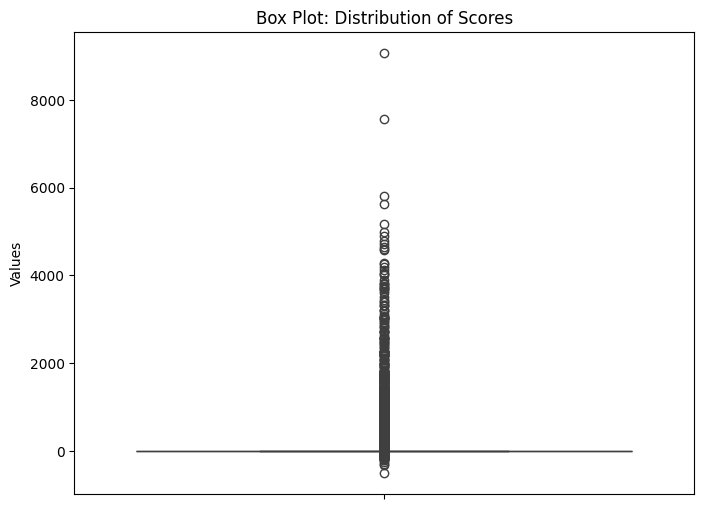

In [ ]:
box_plot(df, 'score', 'Box Plot: Distribution of Scores')
# Shows negative scores

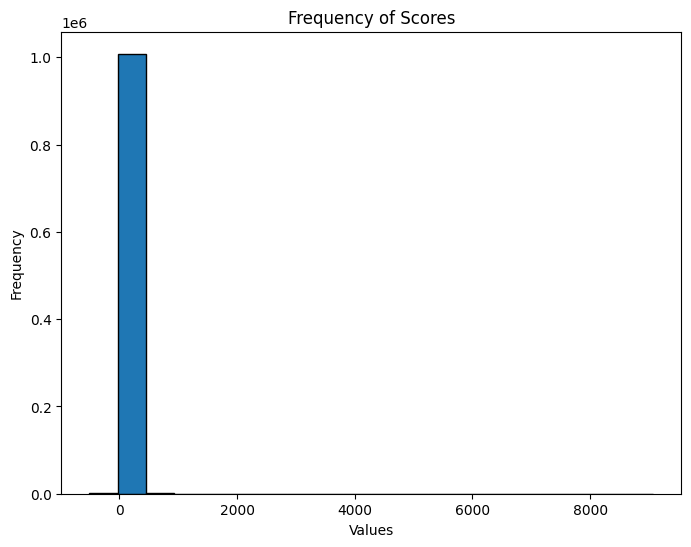

In [ ]:
histogram(df, 'score', 'Frequency of Scores', 20)

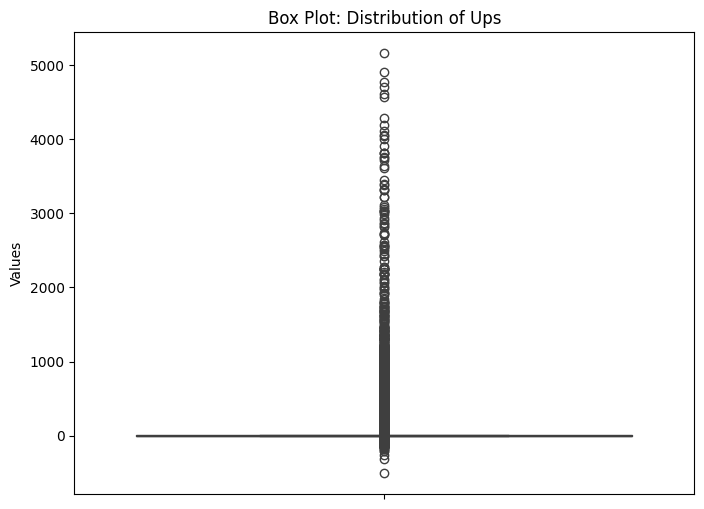

In [ ]:
box_plot(df, 'ups', 'Box Plot: Distribution of Ups')

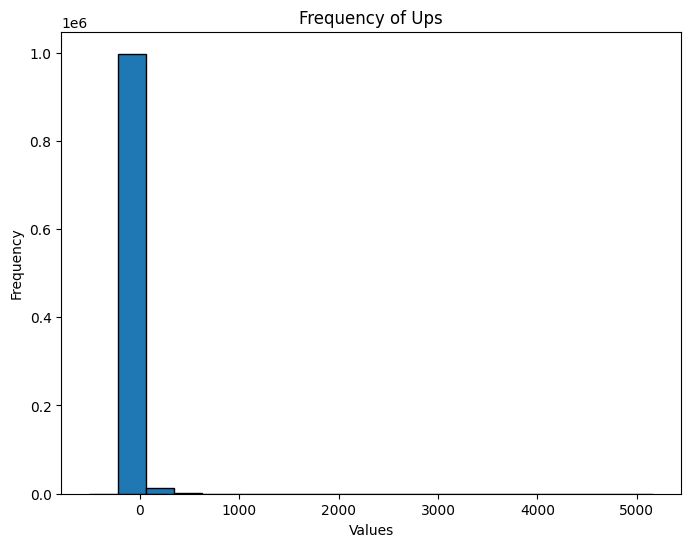

In [ ]:
histogram(df, 'ups', 'Frequency of Ups', 20)

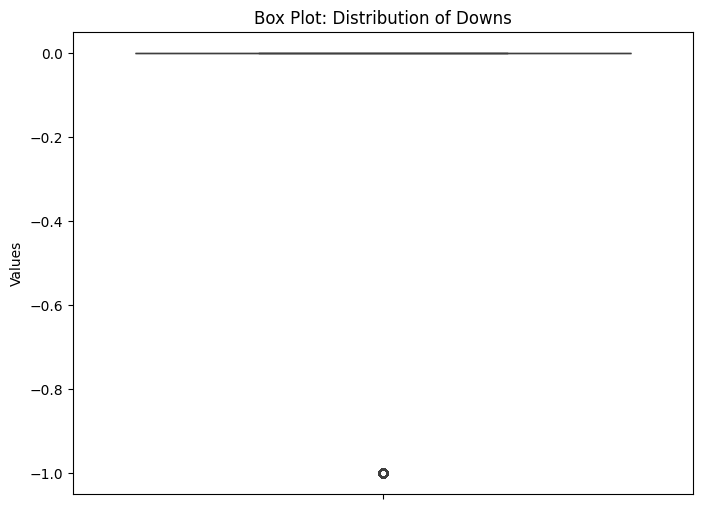

In [ ]:
box_plot(df, 'downs', 'Box Plot: Distribution of Downs')

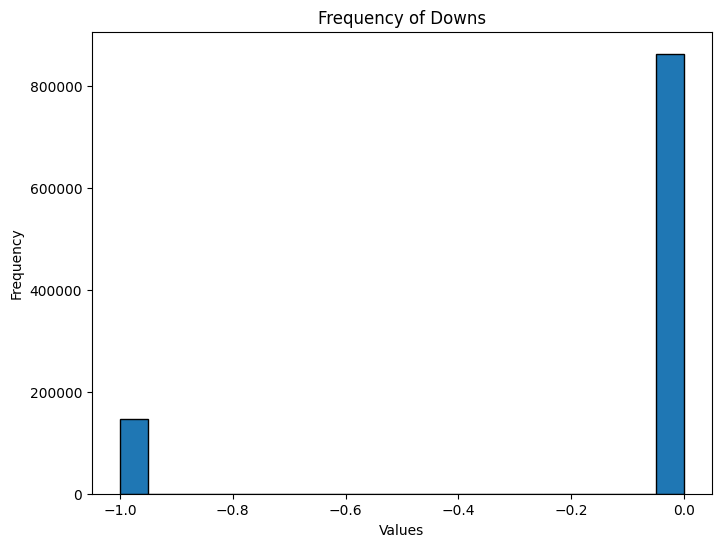

In [ ]:
histogram(df, 'downs', 'Frequency of Downs', 20)

<function matplotlib.pyplot.show(close=None, block=None)>

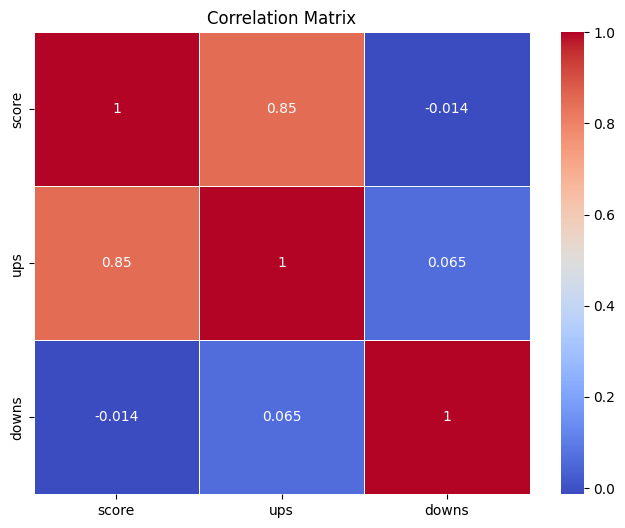

In [ ]:
# Plot correlation matrix

df_numeric = df[['score', 'ups', 'downs']]
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show